In [1]:
%matplotlib inline

In [2]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt

##### Function to simulate coin toss

In [3]:
def coin_toss():
    coin = ['heads', 'tails']
    return random.choice(coin)

##### Function to simulate flipping a coin _n_ times

In [48]:
def coin_simulator(n = 2 ** 16):
    intervals = []
    power = 0
    while (2 ** power) <= n:
        intervals.append(2 ** power)
        power += 1
    if n not in intervals:
        intervals.append(n)
    counter = 1
    totalheads = 0
    totaltails = 0
    heads = []
    tails = []
    while counter <= n:
        result = coin_toss()
        if result == 'heads':
            totalheads += 1
        if result == 'tails':
            totaltails += 1
        if counter in intervals:
            heads.append(totalheads)
            tails.append(totaltails)
        counter += 1
    return intervals, heads, tails

In [49]:
def avg(h, t):
    if t == 0:
        return float('inf')
    else:
        return h / t

intervals, heads, tails = coin_simulator()
diff = [h - t for h,t in zip(heads, tails)]
ratio = [avg(h, t) for h,t in zip(heads, tails)]

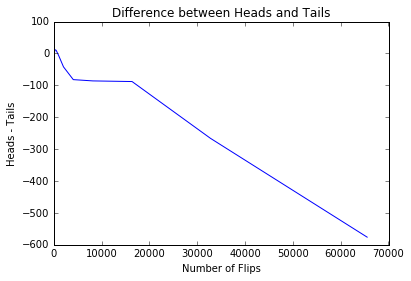

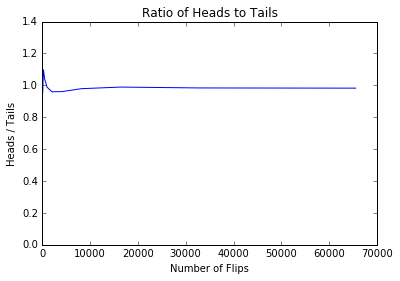

In [50]:
plt.plot(intervals, diff)
plt.title('Difference between Heads and Tails')
plt.ylabel('Heads - Tails')
plt.xlabel('Number of Flips')
plt.show()

plt.plot(intervals, ratio)
plt.title('Ratio of Heads to Tails')
plt.ylabel('Heads / Tails')
plt.xlabel('Number of Flips')
plt.show()

##### Same plots as before, but with logarithmic scaled x-axis

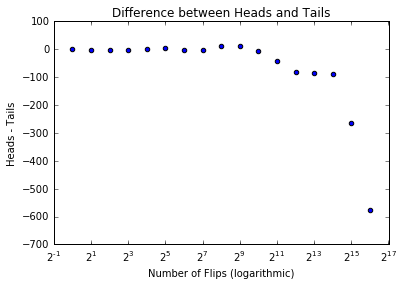

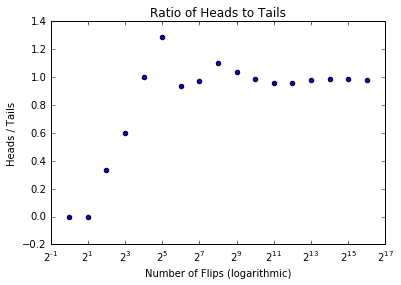

In [51]:
plt.scatter(intervals, diff)
plt.title('Difference between Heads and Tails')
plt.ylabel('Heads - Tails')
plt.xlabel('Number of Flips (logarithmic)')
plt.xscale('log', basex = 2)
plt.show()

plt.scatter(intervals, ratio)
plt.title('Ratio of Heads to Tails')
plt.ylabel('Heads / Tails')
plt.xlabel('Number of Flips (logarithmic)')
plt.xscale('log', basex = 2)
plt.show()

This data does not exactly behave as I would expect.  It appears that the difference between heads and tails takes a nose dive late into the simulation, while I would expect the data to be more or less a horizontal line at the 0 mark.  However, at the end of the simulation it appears there are only about 600 more tails than heads, which is a very small percentage of the total number of flips (over 60,000).  The ratio between heads and tails tends towards 1 over the course of the simulation, which is to be expected.

##### Analysis of 20 trials of coin_simulator

In [54]:
trials = [coin_simulator() for number in list(range(0,20))]
trial_heads = [trial[1] for trial in trials]
trial_tails = [trial[2] for trial in trials]
intervals = trials[0][0]

trial_ratios = [[avg(h, t) for h,t in zip(heads, tails)] for heads, tails in zip(trial_heads, trial_tails)]
trial_ratios_mean = [st.mean(ratio) for ratio in zip(*trial_ratios)]
trial_ratios_stdv = [st.pstdev(ratio) for ratio in zip(*trial_ratios)]

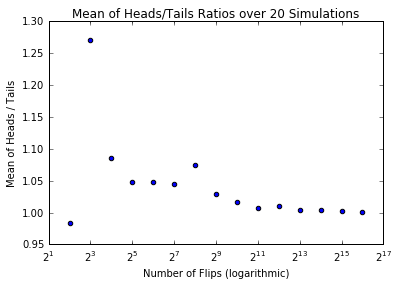

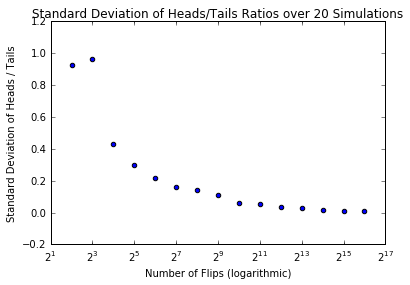

In [55]:
plt.scatter(intervals, trial_ratios_mean)
plt.xscale('log', basex = 2)
plt.title('Mean of Heads/Tails Ratios over 20 Simulations')
plt.xlabel('Number of Flips (logarithmic)')
plt.ylabel('Mean of Heads / Tails')
plt.show()

plt.scatter(intervals, trial_ratios_stdv)
plt.xscale('log', basex = 2)
plt.title('Standard Deviation of Heads/Tails Ratios over 20 Simulations')
plt.xlabel('Number of Flips (logarithmic)')
plt.ylabel('Standard Deviation of Heads / Tails')
plt.show()

The above graphs show the tendency of the ratio of heads/tails as the number of coin flips increases by summarizing the mean and standard deviations of the data gathered from running 20 simulations of flipping a coin 2<sup>16</sup> times.  We see that the mean approaches one and the standard deviation approaches zero.  This means that on average across the 20 simulations, the number of heads and the number of tails come closer and closer together.  The standard deviations tending towards zero further shows that the distance between values generated in the 20 simulations gets shorter as the number of flips increases.

##### 100,000 trials of 100 coin flips

In [73]:
c_trials = [coin_simulator(100) for number in list(range(0, 100000))]

In [74]:
c_heads_prcnt = [(trial[1][-1] / trial[0][-1]) for trial in c_trials]

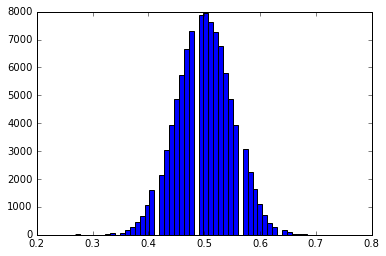

In [75]:
plt.hist(c_heads_prcnt, 50)
plt.show()

##### 100,000 trials of 1,000 coin flips

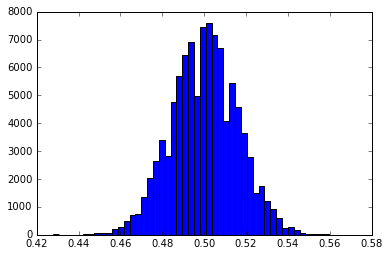

In [72]:
k_trials = [coin_simulator(1000) for number in list(range(0, 100000))]
k_heads_prcnt = [(trial[1][-1] / trial[0][-1]) for trial in k_trials]

plt.hist(k_heads_prcnt, 50)
plt.show()

The above histograms show a more or less normal distribution for the percentage of heads.

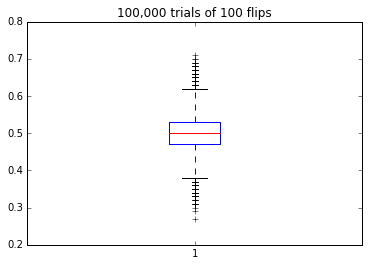

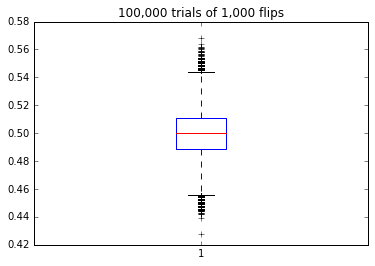

In [77]:
plt.boxplot(c_heads_prcnt)
plt.title('100,000 trials of 100 flips')
plt.show()

plt.boxplot(k_heads_prcnt)
plt.title('100,000 trials of 1,000 flips')
plt.show()

These box plots are very similar.  Both have a median of about 0.50, but the data of the 100 flips simulation is more spread out than that of the 1,000 flips model as you can see by the scall of the y-axis of each respective plot.  This reiterates what was found earlier, that the number of heads out of n flips gets closer and closer to 1/2 (0.5) as n approaches infinity.